Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Extracting the *data*

In [3]:
tweet = pd.read_csv('tweet.csv')
tweet.head()

tweets       class
0  Be aware  dirty step to get money  #staylight ...  figurative
1  #sarcasm for #people who don't understand #diy...  figurative
2  @IminworkJeremy @medsingle #DailyMail readers ...  figurative
3  @wilw Why do I get the feeling you like games?...  figurative
4  -@TeacherArthurG @rweingarten You probably jus...  figurative

In [4]:
# total number of tweets
tweet.count()

tweets    81408
class     81408
dtype: int64

In [5]:
tweet.describe()

tweets       class
count                                               81408       81408
unique                                              67997           4
top     $$$=&gt;&gt; #peace #love #freedom\n#fight for...  figurative
freq                                                   14       21238

We have 67997 Unique tweets out of 4 different classes and a frequency of 14 being the highest of a particular tweet

In [6]:
# Number of Unique Classes
tweet['class'].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

# Cleaning the data

In [7]:
# Creating a dataframe of Duplicate tweets
tweet_dup1 = tweet[tweet['tweets'].duplicated()]
print("Total duplicates :",tweet_dup1.shape)
tweet_dup1.head(20)

Total duplicates : (13411, 2)


tweets       class
12617                                             #Irony  figurative
17820                                             #irony  figurative
21104                                           #sarcasm  figurative
21238  Fav moment in Sepp Blatter vid (0:20): "We hav...       irony
21239  Just found this while walking my human.... #ir...       irony
21241  Do you know that super yeay satisfying feeling...       irony
21242  If you're going to call someone ignorant and s...       irony
21243  Tune in to Nigezie and be treated to Rachel Pl...       irony
21246  Two recent tweets on sexism have been favorite...       irony
21250  Please @DisneyPictures we need more Captain Am...       irony
21254  Head lines http://t.co/TvMkQbtr77 #autocorrect...       irony
21261  #BajrangiBhaijaan 1st movie to watch with my #...       irony
21263  This from a show that's all about time pressur...       irony
21265  @DrunkAtdisney @YoPaulieNJ Sporting new Tervis...       irony
21268  I just looked up some ex girlfriends on Facebo...       irony
21269  @ChrisChristie slams @realDonaldTrump 4 McCain...       irony
21274  President Should give his Resignation. \n#Iron...       irony
21275  Camp craft was fun, but now I - a woman who ne...       irony
21276  @David_Cameron tells ITV News he will take 10%...       irony
21277  @David_Cameron no you're right we shouldn't de...       irony

In [8]:
# Listing out the duplicated tweets along with the original tweet

dup_grp = tweet[tweet.duplicated(subset=['tweets'], keep=False)].groupby(['tweets'])
print("Groups of Duplicate Tweets:")
for group, group_df in dup_grp:
    print(group)
    print(group_df)
    print("\n")

Groups of Duplicate Tweets:
(' http://t.co/1jrya1kJdQ',)
                        tweets       class
8617    http://t.co/1jrya1kJdQ  figurative
31028   http://t.co/1jrya1kJdQ       irony


('"#Dear" is the most #sarcastic  word I find at work place',)
                                                  tweets       class
750    "#Dear" is the most #sarcastic  word I find at...  figurative
62190  "#Dear" is the most #sarcastic  word I find at...     sarcasm


('"... The little bit of crazy that\'s inside of me is the only thing that\'s keeping me sane..." \n\n#ironic #mydesertlife http://t.co/gug9xyDhXm',)
                                                  tweets       class
8774   "... The little bit of crazy that's inside of ...  figurative
31260  "... The little bit of crazy that's inside of ...       irony


('"... these kind of killings are just outrageous and the public’s outraged I’m sure across the board." #irony  https://t.co/g1SPRD2Lto',)
                                          




('"You should learn to shoot first, Solo."\n―Boba Fett\n#Ironic #StarWars\nhttp://t.co/Wckt7s5OlT',)
                                                  tweets       class
15622  "You should learn to shoot first, Solo."\n―Bob...  figurative
39387  "You should learn to shoot first, Solo."\n―Bob...       irony


('"You\'ll fall in love with someone who\'ll not love you back, for not loving someone who did".\n#Irony\n#Karma',)
                                                  tweets       class
5060   "You'll fall in love with someone who'll not l...  figurative
27014  "You'll fall in love with someone who'll not l...       irony


('"You\'re so meeeaaan" coming from one of the twins. #Irony #BBAD',)
                                                  tweets       class
11290  "You're so meeeaaan" coming from one of the tw...  figurative
34044  "You're so meeeaaan" coming from one of the tw...       irony


('"it\'s a tragedy because local governments aren\'t following federal law"…makes m

In [9]:
#total number of duplicates
dup_grp.size().sum()

26790

As the amount of duplicates are high, creating different data sets by keeping first, last and unique tweets irrespective of classes

# Dropping Duplicates

In [10]:
# Create a new dataframe containing only First tweets
tweet_1 = tweet.drop_duplicates(subset=["tweets"], keep="first")
tweet_1.reset_index(drop=True, inplace= True)
tweet_1.to_csv("First_tweets.csv", index=False)
tweet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67997 entries, 0 to 67996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  67997 non-null  object
 1   class   67997 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [11]:
# Create a new dataframe containing only Last tweets
tweet_2 = tweet.drop_duplicates(subset=["tweets"], keep="last")
tweet_2.reset_index(drop=True, inplace= True)
tweet_2.to_csv("Last_tweets.csv", index=False)
tweet_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67997 entries, 0 to 67996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  67997 non-null  object
 1   class   67997 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [12]:
# Create a new dataframe Without any duplicated tweets
tweet_3 = tweet.drop_duplicates(subset=["tweets"], keep= False)
tweet_3.reset_index(drop=True, inplace= True)
tweet_3.to_csv("Unique_tweets.csv", index=False)
tweet_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54618 entries, 0 to 54617
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  54618 non-null  object
 1   class   54618 non-null  object
dtypes: object(2)
memory usage: 853.5+ KB


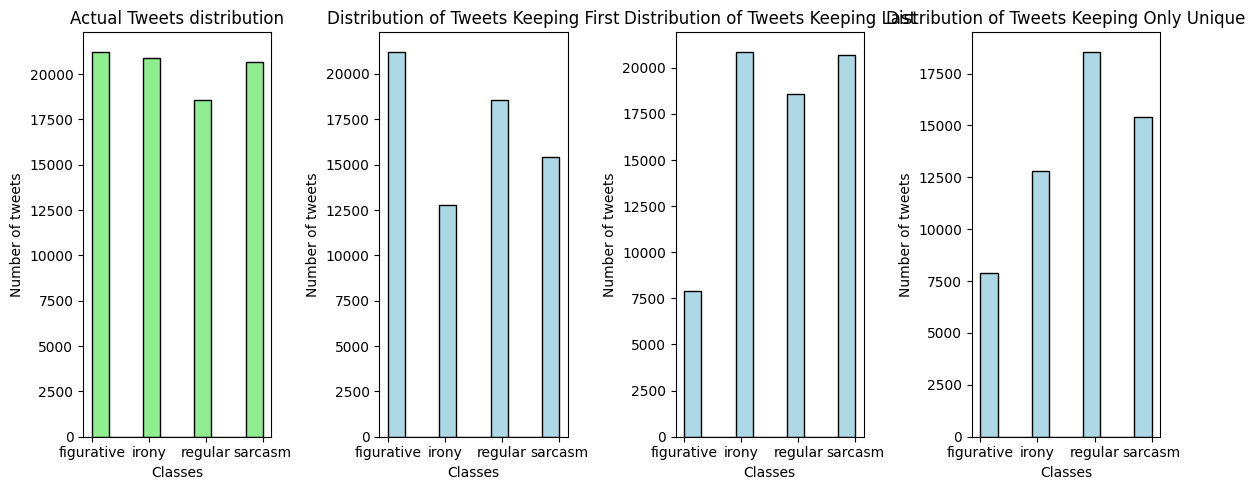

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(12, 5))

axes[0].hist(tweet['class'], color="lightgreen", edgecolor='black')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Number of tweets')
axes[0].set_title('Actual Tweets distribution')

axes[1].hist(tweet_1['class'], color="lightblue", edgecolor='black')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Number of tweets')
axes[1].set_title('Distribution of Tweets Keeping First')

axes[2].hist(tweet_2['class'], color="lightblue", edgecolor='black')
axes[2].set_xlabel('Classes')
axes[2].set_ylabel('Number of tweets')
axes[2].set_title('Distribution of Tweets Keeping Last')

axes[3].hist(tweet_3['class'], color="lightblue", edgecolor='black')
axes[3].set_xlabel('Classes')
axes[3].set_ylabel('Number of tweets')
axes[3].set_title('Distribution of Tweets Keeping Only Unique')


plt.tight_layout()
plt.show()

# Final Data view

### tweet_1 dataframe - Keeping First

In [14]:
tweet_1.describe()

tweets       class
count                                               67997       67997
unique                                              67997           4
top     Be aware  dirty step to get money  #staylight ...  figurative
freq                                                    1       21235

In [15]:
tweet_cnt = pd.DataFrame(tweet['class'].value_counts())
twt_dup_cnt = pd.DataFrame(tweet_1['class'].value_counts())
difference = tweet_cnt - twt_dup_cnt
final_cnt = pd.concat([tweet_cnt, twt_dup_cnt, difference], axis=1)
totals = final_cnt.sum()
final_cnt.loc['Total'] = totals
new_column_names = ['Actual_tweets', 'After_dropping', 'Difference']
final_cnt.columns = new_column_names
final_cnt

Actual_tweets  After_dropping  Difference
class                                                
figurative          21238           21235           3
irony               20894           12789        8105
sarcasm             20681           15404        5277
regular             18595           18569          26
Total               81408           67997       13411

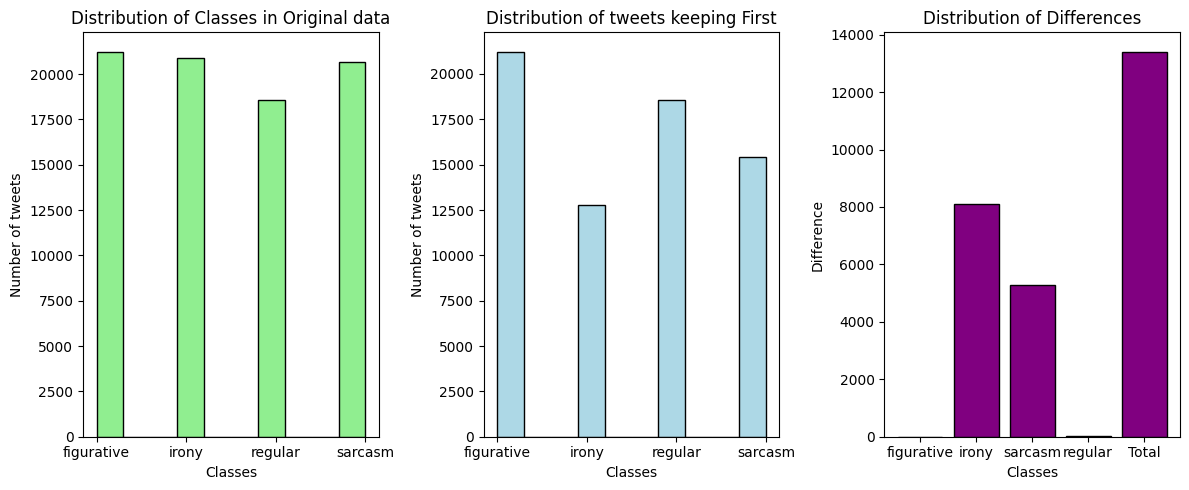

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

axes[0].hist(tweet['class'], color="lightgreen", edgecolor='black')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Number of tweets')
axes[0].set_title('Distribution of Classes in Original data')

axes[1].hist(tweet_1['class'], color="lightblue", edgecolor='black')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Number of tweets')
axes[1].set_title('Distribution of tweets keeping First')

plt.bar(final_cnt.index, final_cnt['Difference'], color="Purple", edgecolor='black')
plt.xlabel('Classes')
plt.ylabel('Difference')
plt.title('Distribution of Differences')


plt.tight_layout()
plt.show()

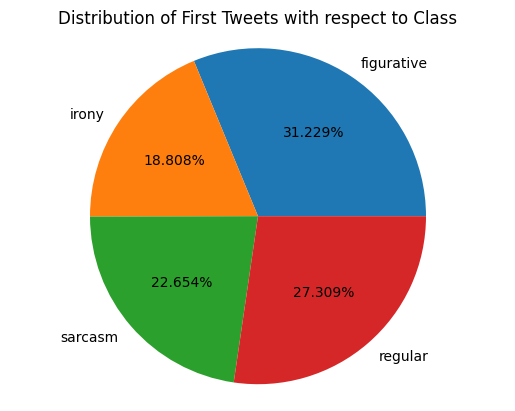

In [17]:
pie=final_cnt.iloc[0:4]
plt.pie(pie['After_dropping'], labels=pie.index, autopct='%1.3f%%')
plt.axis('equal')
plt.title('Distribution of First Tweets with respect to Class')
plt.show()

## tweet_2 dataframe - Keeping Last

In [18]:
tweet_2.describe()

tweets  class
count                                               67997  67997
unique                                              67997      4
top     #sarcasm for #people who don't understand #diy...  irony
freq                                                    1  20877

In [19]:
tweet_cnt = pd.DataFrame(tweet['class'].value_counts())
twt_dup_cnt = pd.DataFrame(tweet_2['class'].value_counts())
difference = tweet_cnt - twt_dup_cnt
final_cnt = pd.concat([tweet_cnt, twt_dup_cnt, difference], axis=1)
totals = final_cnt.sum()
final_cnt.loc['Total'] = totals
new_column_names = ['Actual_tweets', 'After_dropping', 'Difference']
final_cnt.columns = new_column_names
final_cnt

Actual_tweets  After_dropping  Difference
class                                                
figurative          21238            7873       13365
irony               20894           20877          17
sarcasm             20681           20678           3
regular             18595           18569          26
Total               81408           67997       13411

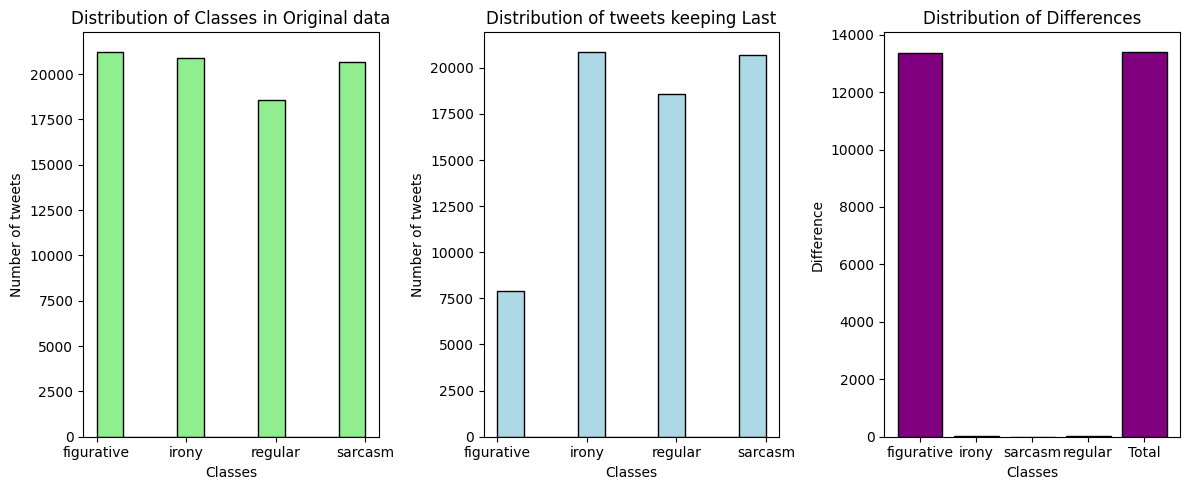

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

axes[0].hist(tweet['class'], color="lightgreen", edgecolor='black')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Number of tweets')
axes[0].set_title('Distribution of Classes in Original data')

axes[1].hist(tweet_2['class'], color="lightblue", edgecolor='black')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Number of tweets')
axes[1].set_title('Distribution of tweets keeping Last')

plt.bar(final_cnt.index, final_cnt['Difference'], color="Purple", edgecolor='black')
plt.xlabel('Classes')
plt.ylabel('Difference')
plt.title('Distribution of Differences')


plt.tight_layout()
plt.show()

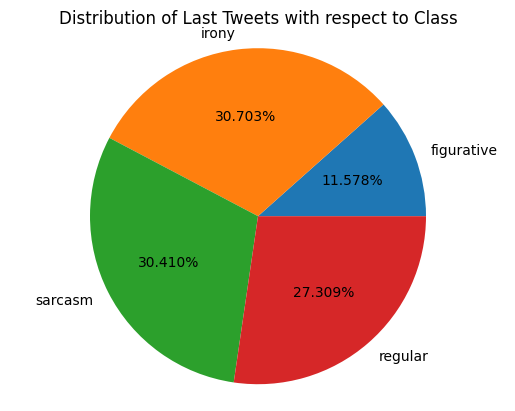

In [21]:
pie=final_cnt.iloc[0:4]
plt.pie(pie['After_dropping'], labels=pie.index, autopct='%1.3f%%')
plt.axis('equal')
plt.title('Distribution of Last Tweets with respect to Class')
plt.show()

## tweet_3 dataframe - Keeping only Unique Tweets

In [22]:
tweet_3.describe()

tweets    class
count                                               54618    54618
unique                                              54618        4
top     #sarcasm for #people who don't understand #diy...  regular
freq                                                    1    18557

In [23]:
tweet_cnt = pd.DataFrame(tweet['class'].value_counts())
twt_dup_cnt = pd.DataFrame(tweet_3['class'].value_counts())
difference = tweet_cnt - twt_dup_cnt
final_cnt = pd.concat([tweet_cnt, twt_dup_cnt, difference], axis=1)
totals = final_cnt.sum()
final_cnt.loc['Total'] = totals
new_column_names = ['Actual_tweets', 'After_dropping', 'Difference']
final_cnt.columns = new_column_names
final_cnt

Actual_tweets  After_dropping  Difference
class                                                
figurative          21238            7873       13365
irony               20894           12784        8110
sarcasm             20681           15404        5277
regular             18595           18557          38
Total               81408           54618       26790

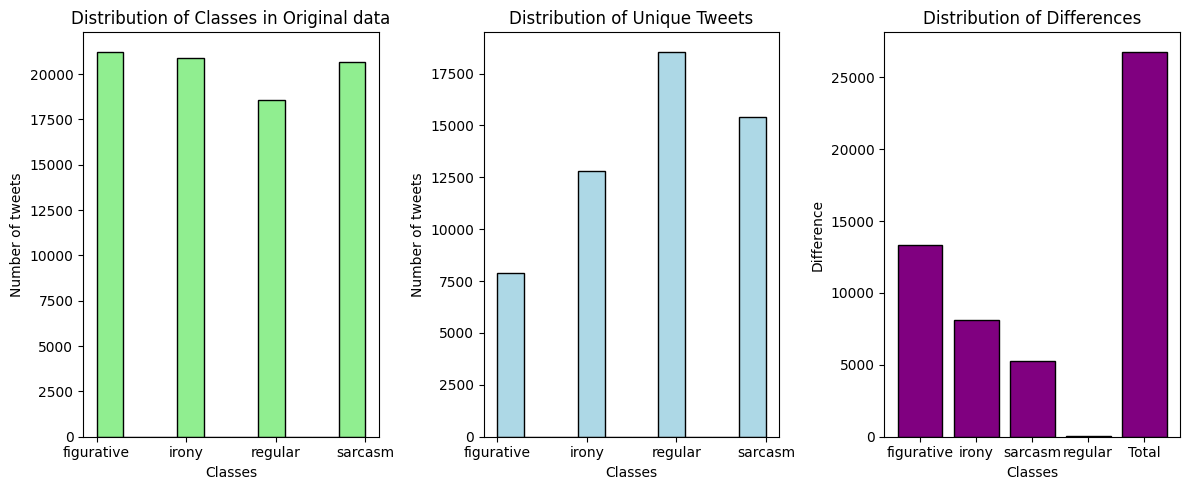

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

axes[0].hist(tweet['class'], color="lightgreen", edgecolor='black')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Number of tweets')
axes[0].set_title('Distribution of Classes in Original data')

axes[1].hist(tweet_3['class'], color="lightblue", edgecolor='black')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Number of tweets')
axes[1].set_title('Distribution of Unique Tweets')

plt.bar(final_cnt.index, final_cnt['Difference'], color="Purple", edgecolor='black')
plt.xlabel('Classes')
plt.ylabel('Difference')
plt.title('Distribution of Differences')


plt.tight_layout()
plt.show()

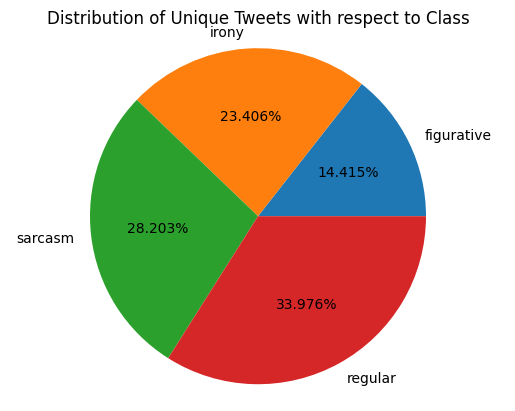

In [25]:
pie=final_cnt.iloc[0:4]
plt.pie(pie['After_dropping'], labels=pie.index, autopct='%1.3f%%')
plt.axis('equal')
plt.title('Distribution of Unique Tweets with respect to Class')
plt.show()